In [1]:
import pandas as pd

# Load the dataset from the specified path
file_path = '../INSTAGRAM_REVIEWS.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,number,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,ff25650a-a9e1-4c02-a8e8-0c85b9ee1dc9,127325963209728431078,B ****or,Used this app for years. Was a great way to es...,1,0,216.1.0.21.137,2022-01-05 23:37:15
1,1,7e1840fe-4307-4c97-974c-437ec6c64e60,148177168797697591284,مس*******لو,khayemalo sag bgad,5,0,155.0.0.37.107,2022-01-05 23:39:29
2,2,3c8ba6fc-3009-4b1c-9a24-9ea635799a9a,162050472706594017332,Li********on,Lovely,5,0,NaN,2022-01-05 23:39:32
3,3,47c54668-dbac-4f8f-a98a-3ede00a103ea,264067006274581079256,Fa******Zx,best,5,0,NaN,2022-01-05 23:39:50
4,4,464a6a51-9a9f-44b0-80b5-eeea24adcd57,224172402296862948810,fr***************67,Super,5,0,216.0.0.20.137,2022-01-05 23:40:08


In [2]:
# -------------------------------------------
# Use this if you have an error about the SSL
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
# -------------------------------------------

import nltk
# -----------------------
# Used when first run
# nltk.download('wordnet')
# nltk.download('stopwords')
# -----------------------

import pandas as pd
import re
import string

from langdetect import detect
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
stop_words = stopwords.words()

from collections import Counter

In [3]:
data = pd.read_csv('INSTAGRAM_REVIEWS.csv')
# remove unused column
data.drop([ 
            "review_id", 
            "pseudo_author_id",
            "author_name",
            "review_likes",
            "author_app_version",
            "review_timestamp",
          ], inplace=True, axis=1)

#  change column name
data.rename(columns={'review_text': 'text'}, inplace=True)
data.rename(columns={'review_rating': 'sentiment'}, inplace=True)

#  save to new file
data.to_csv('dataset_cleaned_1.csv', index=False)

In [4]:
import re
import string
from collections import Counter
from langdetect import detect

# Remove numbers
def remove_numbers(text):
    if isinstance(text, str):
        return ''.join(char for char in text if not char.isdigit())
    else:
        return text

# Remove unwanted characters, URLs, and special symbols
def remove_character(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'https?://\S+|www\.\S+', '', text)  # remove URLs
        text = re.sub(r"\b\d+\b", "", text)  # remove numbers
        text = re.sub(r'<.*?>+', '', text)  # remove HTML tags
        text = re.sub(r'[{}]'.format(re.escape(string.punctuation)), '', text)  # remove punctuation
        text = re.sub(r'\n', '', text)  # remove newlines
        text = re.sub(r'[’“”…]', '', text)  # remove special characters
        return text
    else:
        return text

# Remove emojis
def remove_emoji(text):
    if isinstance(text, str):
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F700-\U0001F77F"  # alchemical symbols
                                   u"\U0001F780-\U0001F7FF"  # geometric shapes extended
                                   u"\U0001F800-\U0001F8FF"  # supplemental arrows
                                   u"\U0001F900-\U0001F9FF"  # supplemental symbols
                                   u"\U00002702-\U000027B0"  # dingbats
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    else:
        return text

# Remove contractions/short forms
def remove_short_form(text):
    if isinstance(text, str):
        text = re.sub(r"isn't", 'is not', text)
        text = re.sub(r"he's", 'he is', text)
        text = re.sub(r"wasn't", 'was not', text)
        text = re.sub(r"there's", 'there is', text)
        text = re.sub(r"couldn't", 'could not', text)
        text = re.sub(r"won't", 'will not', text)
        text = re.sub(r"they're", 'they are', text)
        text = re.sub(r"she's", 'she is', text)
        text = re.sub(r"wouldn't", 'would not', text)
        text = re.sub(r"haven't", 'have not', text)
        text = re.sub(r"that's", 'that is', text)
        text = re.sub(r"you've", 'you have', text)
        text = re.sub(r"what's", 'what is', text)
        text = re.sub(r"weren't", 'were not', text)
        text = re.sub(r"we're", 'we are', text)
        text = re.sub(r"hasn't", 'has not', text)
        text = re.sub(r"shouldn't", 'should not', text)
        text = re.sub(r"let's", 'let us', text)
        text = re.sub(r"i'm", 'i am', text)
        text = re.sub(r"it's", 'it is', text)
        text = re.sub(r"don't", 'do not', text)
        text = re.sub(r"i’d", 'i did', text)
        return text
    else:
        return text

# Remove multiple spaces
def remove_multiple_space(text):
    if isinstance(text, str):
        text = text.strip()
        text = re.sub(r'\s+', ' ', text)
        return text
    else:
        return text

# Detect and filter non-English text
def detect_english(text):
    try:
        return detect(text) == 'en'
    except Exception as e:
        print(f"Error detecting language: {e} - {text}")
        return False

# Remove frequent words
cnt = Counter()
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])

def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])


In [5]:
# remove number
data = pd.read_csv('dataset_cleaned_1.csv')
data['text'] = data['text'].apply(remove_numbers)
data.to_csv('dataset_cleaned_2.csv', index=False)

In [6]:
data = pd.read_csv('dataset_cleaned_2.csv')
data['text'] = data['text'].apply(remove_character)
data.to_csv('dataset_cleaned_3.csv', index=False)

In [7]:
# remove emoji
data = pd.read_csv('dataset_cleaned_3.csv')
data['text'] = data['text'].apply(remove_emoji)
data.to_csv('dataset_cleaned_4.csv', index=False)

In [8]:
# remove short form
data = pd.read_csv('dataset_cleaned_4.csv')
data['text'] = data['text'].apply(remove_short_form)
data.to_csv('dataset_cleaned_5.csv', index=False)

In [9]:
# remove multiple space
data = pd.read_csv('dataset_cleaned_5.csv')
data['text'] = data['text'].apply(remove_multiple_space)
data.to_csv('dataset_cleaned_6.csv', index=False)

In [10]:
# remove empty record and duplicate data
data = pd.read_csv('dataset_cleaned_6.csv')
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.to_csv('dataset_cleaned_7.csv', index=False)

In [11]:
# remove record non-english
data = pd.read_csv('dataset_cleaned_7.csv')
data['is_english'] = data['text'].apply(detect_english)
data = data[data['is_english']]
data = data.drop(columns=['is_english'])
data.to_csv('dataset_cleaned_8.csv', index=False)

Error detecting language: No features in text. - ‍
Error detecting language: No features in text. - ᴠᴇʀy ɴɪᴄᴇ ᴀᴩᴩ
Error detecting language: No features in text. - ရတနာ
Error detecting language: No features in text. - ‍
Error detecting language: No features in text. - ℎ
Error detecting language: No features in text. - tʜᴇ ʙᴇsᴛ ᴀᴘᴘ
Error detecting language: No features in text. - စပီးပေးတာတကယ်မကောင်းဘူး
Error detecting language: No features in text. - ฅ••ฅ
Error detecting language: No features in text. - អូន និច
Error detecting language: No features in text. - yᑌᗩᖇ iᑎտtᗩᖇᗩᑎ ᑎot ᖇᗴᗴᒪտ ᕼᗩᐯᗴ ᑭᗩᖇoᗰᗷᗩᒪ տoᒪ ᑭᗩᒪiտտ
Error detecting language: No features in text. - sᕼᗩᐯeᒍ ᑕᕼ
Error detecting language: No features in text. - ɴɪᴄᴇ
Error detecting language: No features in text. - බෙස්ට්
Error detecting language: No features in text. - ႁၵ်ႉ
Error detecting language: No features in text. - ဝပဲဓသြဝ
Error detecting language: No features in text. - i ᴅᴏɴᴛ ʟɪᴋᴇ ᴛʜɪs ᴀᴘᴘ ʙᴇᴀᴄᴜsᴇ ɪ ᴅᴏɴᴛ ʜᴀᴠᴇ ʀᴇᴘʟʏ ᴏᴘᴛɪᴏɴ ᴀɴᴅ

In [12]:
# remove stop word:
data = pd.read_csv('dataset_cleaned_8.csv')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
data.to_csv('dataset_cleaned_9.csv', index=False)

In [13]:
# remove empty record and duplicate data
data = pd.read_csv('dataset_cleaned_9.csv')
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.to_csv('dataset_cleaned_9.csv', index=False)

In [14]:
# Remove the most frequent words:
data = pd.read_csv('dataset_cleaned_9.csv')
data["text"] = data["text"].apply(lambda text: remove_freqwords(text))
data.to_csv('dataset_cleaned_10.csv', index=False)

In [15]:
# Change Rating
data = pd.read_csv('dataset_cleaned_10.csv')
data['sentiment'] = [0 if each in (1, 2, 3) else 1 for each in data.sentiment]
data.to_csv('dataset_cleaned_11.csv', index=False)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer
import pandas as pd

# Load your dataset
data = pd.read_csv('dataset_cleaned_11.csv')

# Custom tokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# CountVectorizer with tokenizer and token_pattern set to None
cv = CountVectorizer(stop_words='english', ngram_range=(1, 1), tokenizer=token.tokenize, token_pattern=None)
text_counts = cv.fit_transform(data['text'])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['sentiment'], test_size=0.20, random_state=30)

In [31]:
model = ComplementNB()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('ComplementNB model accuracy is', str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')

print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

ComplementNB model accuracy is 82.60%
------------------------------------------------
Confusion Matrix:
       0       1
0  86918   19156
1  23219  114224
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80    106074
           1       0.86      0.83      0.84    137443

    accuracy                           0.83    243517
   macro avg       0.82      0.83      0.82    243517
weighted avg       0.83      0.83      0.83    243517



In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

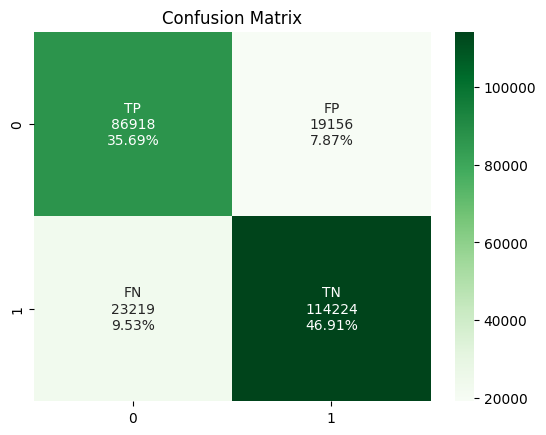

In [30]:
# Confusion Matrix Visualization
cf_matrix = confusion_matrix(y_test, predicted)

group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

plt.title('Confusion Matrix')
plt.show()

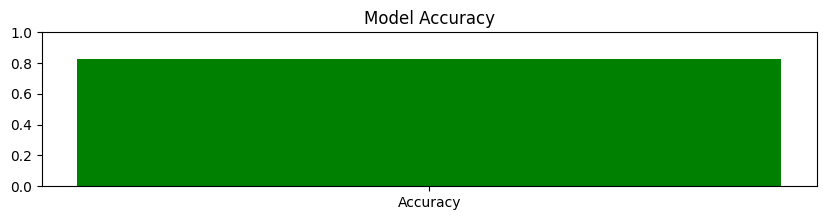

ComplementNB model accuracy is 82.60%


In [20]:
# Accuracy Visualization
accuracy_score = metrics.accuracy_score(predicted, y_test)
plt.figure(figsize=(10, 2))
plt.bar(['Accuracy'], [accuracy_score], color=['green'])
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.show()
print('ComplementNB model accuracy is', str('{:04.2f}'.format(accuracy_score*100))+'%')

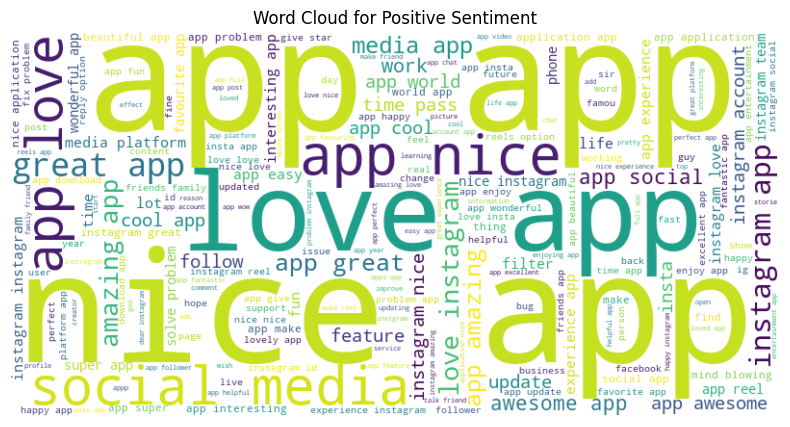

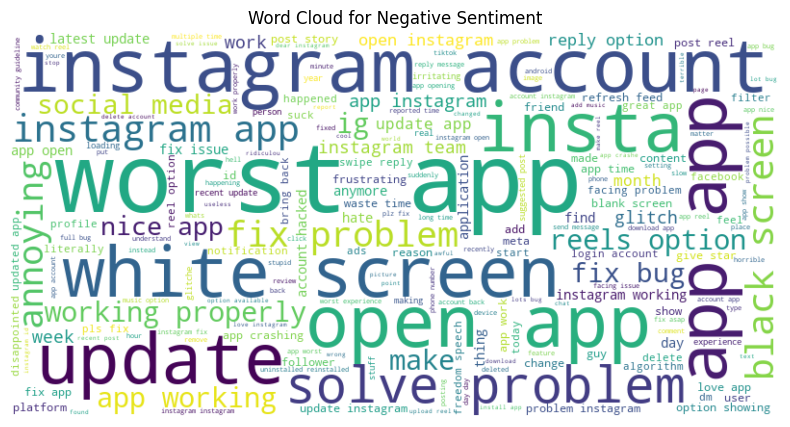

In [21]:
# Word Cloud Visualization
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400,background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Sentiment Positive
positive_text = ' '.join(data[data['sentiment'] == 1]['text'])
plot_wordcloud(positive_text, 'Word Cloud for Positive Sentiment')

# Sentiment Positive
negatif_text = ' '.join(data[data['sentiment'] == 0]['text'])
plot_wordcloud(negatif_text, 'Word Cloud for Negative Sentiment')

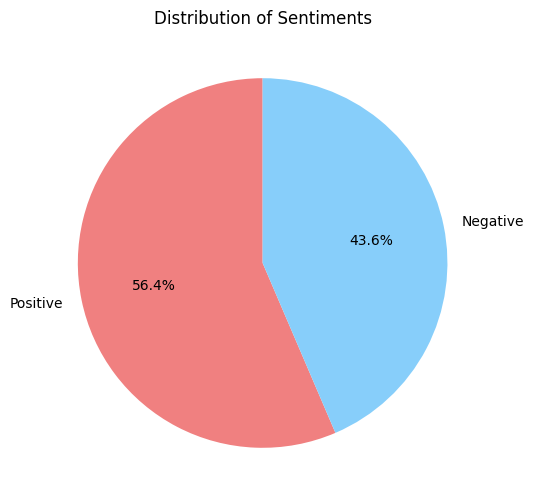

In [32]:
# Visualization Sentiment
data['sentiment'] = data['sentiment'].replace({1: 'Positive', 0: 'Negative'})
sentiment_counts = data['sentiment'].value_counts()

# Visualization with pie charts
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index,autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Sentiments')
plt.show()

In [33]:
import joblib

# Save the trained model
joblib.dump(model, 'ogcnbNew_sentiment_model.pkl')

# Save the CountVectorizer
joblib.dump(cv, 'ogcnb_new_count_vectorizer.pkl')


['ogcnb_new_count_vectorizer.pkl']

In [34]:
import joblib

# Load the trained model and vectorizer
model = joblib.load('ogcnbNew_sentiment_model.pkl')
cv = joblib.load('ogcnb_new_count_vectorizer.pkl')

# Function to predict sentiment for a new input
def predict_sentiment(input_text):
    # Preprocess the input_text
    input_text_cleaned = remove_numbers(input_text)
    input_text_cleaned = remove_character(input_text_cleaned)
    input_text_cleaned = remove_emoji(input_text_cleaned)
    input_text_cleaned = remove_short_form(input_text_cleaned)
    input_text_cleaned = remove_multiple_space(input_text_cleaned)
    
    # Convert input text into numerical format using CountVectorizer
    input_text_vectorized = cv.transform([input_text_cleaned])
    
    # Predict sentiment (0 = Negative, 1 = Positive)
    prediction = model.predict(input_text_vectorized)
    
    # Return the prediction result
    return 'Positive' if prediction[0] == 1 else 'Negative'

# Example usage
new_review = "I love this app, it's amazing!"
print(predict_sentiment(new_review))  # Output will be Positive or Negative


Positive
